In [77]:
%load_ext autoreload
%autoreload 2
import sys 
sys.path.append("/Users/julianganzabal/facultad/lab-ml/mllab-tools")

# RNN (Recurrent Neural Networks)
Articulo recomendado: http://karpathy.github.io/2015/05/21/rnn-effectiveness/

## Que tienen de nuevo respecto a MLP y CNN?
- MLP y CNN solo aceptan un vector de entrada de tamaño fijo y devuelve una vector de salida de tamaño fijo
- RNN trabjan con secuencias tanto a la entrada como a la salida

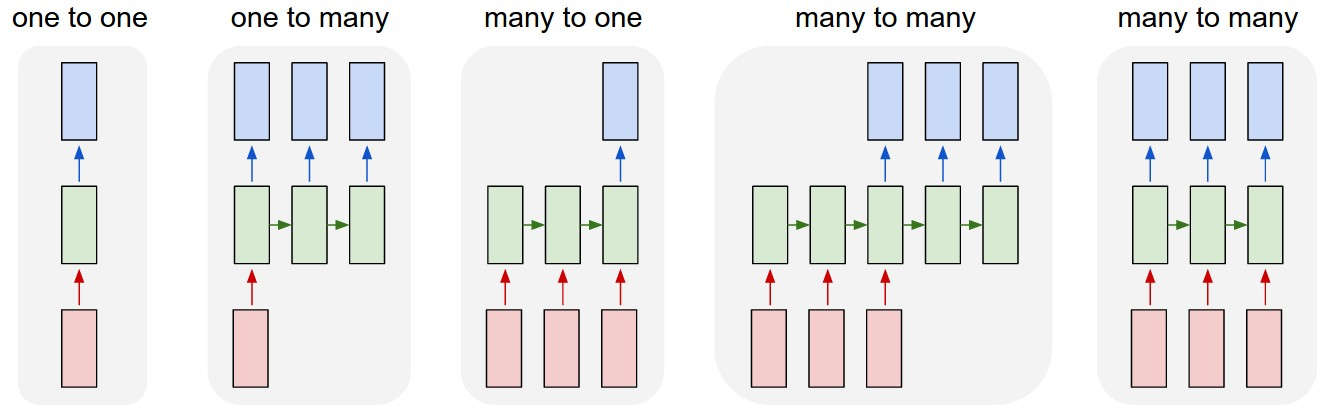

Aclaraciones: 
- Cada cuadrado no es una neurona si no una capa que puede contener N neuronas
- Cada flecha representa la interconexión entre dos capas. Los pesos forman una matriz de la N1xN2 donde N1 y N2 son la cantidad de neuronas en cada capa respectivamente.

## Tipos
- **One to One**: CNN, MLP
- **One to many**: Image captioning
- **Many to one**: Sentiment Analisys, Detectar voz de hombre vs voz de mujer
- **Many to Many**: Traducción
- **Many to Many Sincronizado**: Etiquetado de tramas de video, Brain Computer Interface (BCI): Controlar una silla de ruedas

# Modelos de lenguaje Generativos:
- Predecir la proxima palabra en funcion de las anteriores
- Predecir el proximo caracter en función de los anteriores

**Resultado**: Probabilidad en función de una secuencia

**Aplicaciones** (Mas allá de la posibilidad de generar texto):
- OCR
- Speach2Text
- Detección de autores

## "If training vanilla neural nets is optimization over functions, training recurrent nets is optimization over programs."
- Es una secuencia de ejecución mas que una clasificación
- Las RNN son Turing completo en principio [Turing Complete](https://en.wikipedia.org/wiki/Turing_completeness), [RNN Turing complete](http://binds.cs.umass.edu/papers/1995_Siegelmann_Science.pdf)

# Detalles de la arquitectura:

## Unidad de Elman o RNN unit

**Nota importante**: Cada unidad no es una neurona sino que una capa

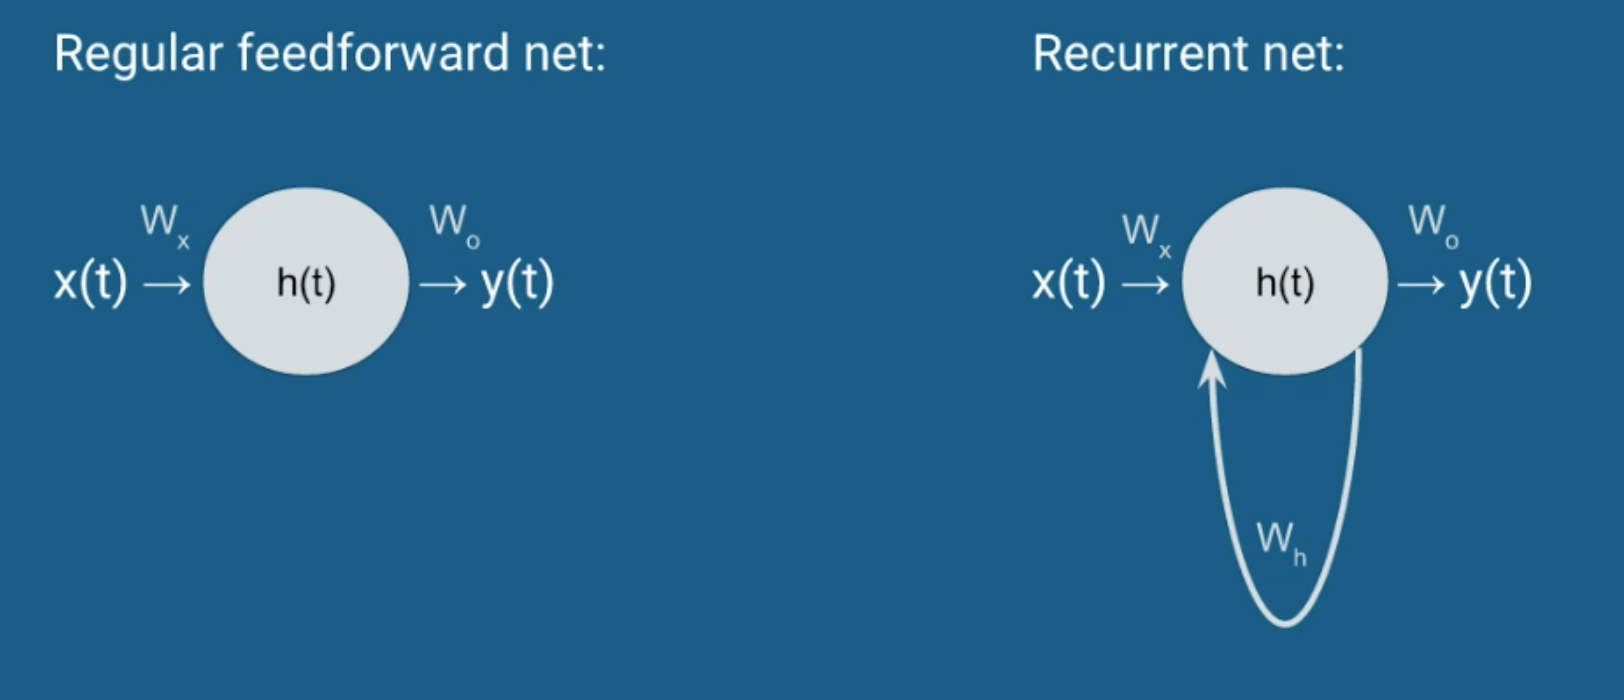
¿Cual es el tamaño de $W_h$?

Todo se conecta con todo -> Si hay M hidden units tenemos $M^2$ $W_h$s 

## En ecuaciones:
$h_t = f(W_h^T h_{t-1} + W_x^T X_t + b_h)$

$y_t = softmax(W_o^T h_t + b_o)$

$f$ es tanh usualmente pero puede ser RELU, sigmoid, etc

In [58]:
# Ejemplo
M = 2

h = np.array([1, -2]).reshape(2,1)
Wh = np.array([[0,-1], [2,1]])

# Dimension de entrada 4
Xt = np.array([1, -1, 2]).reshape(3,1)
print('Xt')
print(Xt)
# Dimension de Wx?
Wx = np.array([[-1,1],[1,0],[2,1]])
print("Wx:")
print(Wx)

bo = np.array([-1, 1]).reshape(2,1)

print('h:')
print(h)
print('Wh:')
print(Wh)
print()

Xt
[[ 1]
 [-1]
 [ 2]]
Wx:
[[-1  1]
 [ 1  0]
 [ 2  1]]
h:
[[ 1]
 [-2]]
Wh:
[[ 0 -1]
 [ 2  1]]



In [61]:
a = Wh.T.dot(h) + Wx.T.dot(Xt) + bo
h_ = np.tanh(a)
print(a)
print('h luego de time step:')
print(h_)

[[-3]
 [ 1]]
h luego de time step:
[[-0.99505475]
 [ 0.76159416]]


In [72]:
Wo = np.array([[0.5, 0.5],[0.5, 0.5]]).reshape(2,2)
ao = Wo.T.dot(h_)
print(ao)
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

print(softmax(ao))

[[-0.1167303]
 [-0.1167303]]
[[ 0.5]
 [ 0.5]]


# Podemos stackear varias capas?

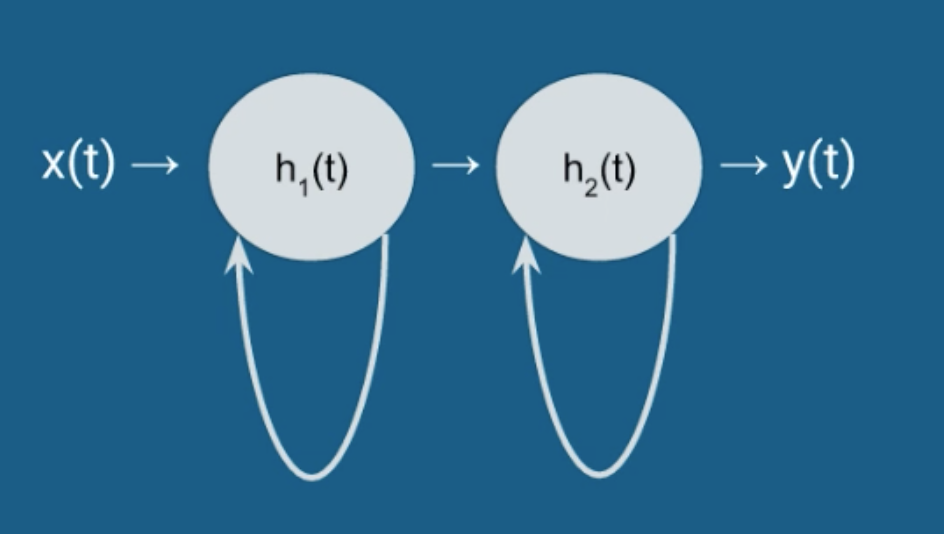

## Desplegando (Unfolding) la RNN
- Secuencia de longitud 5

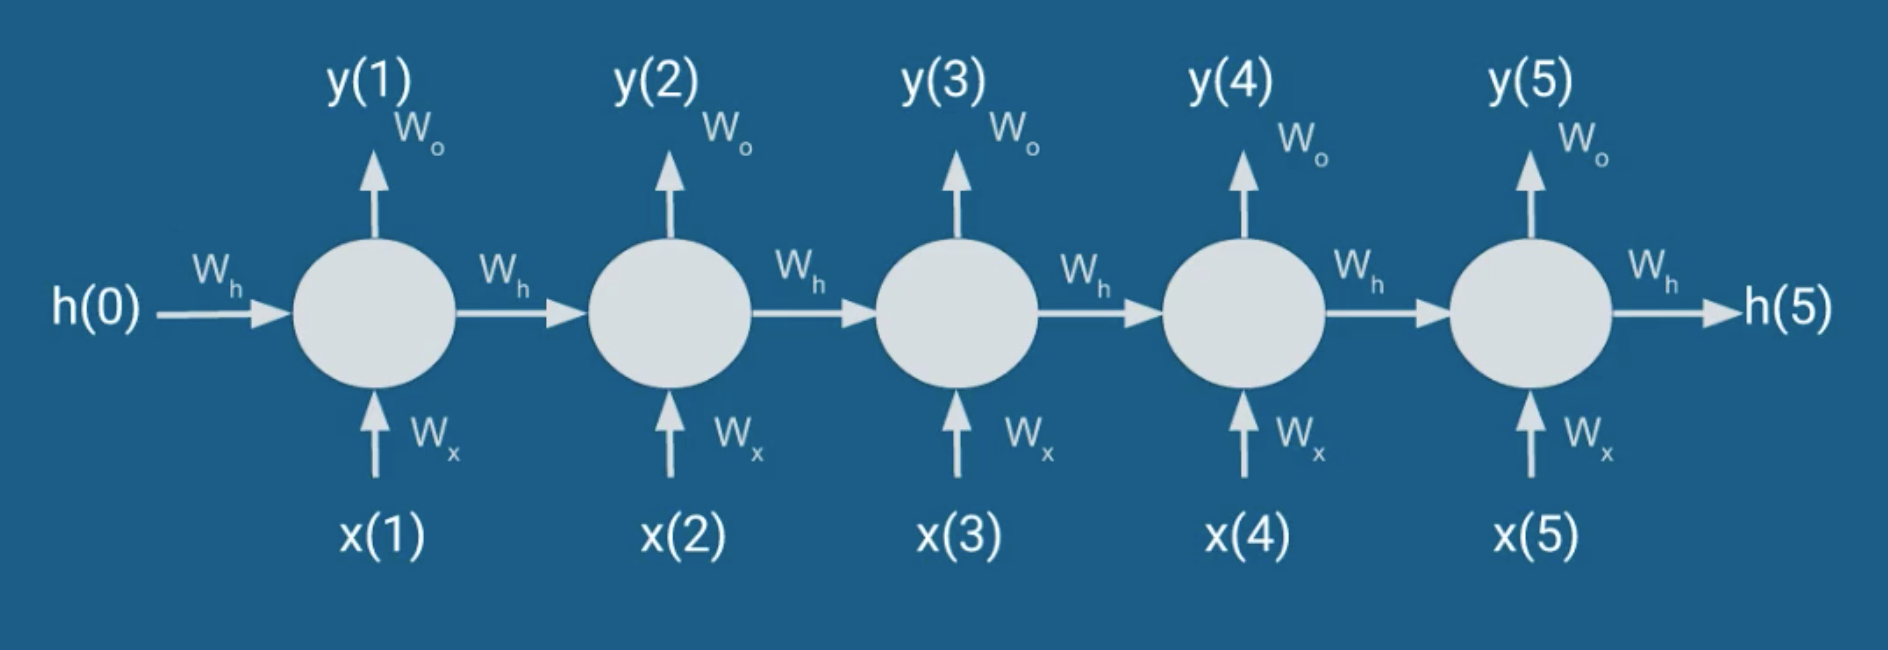

Observaciones:
- Es como una FNN con 5 hidden layers pero con pesos compartidos (Shared weights): $W_h, W_o, W_x$
- Donde habiamos visto pesos compartidos?
- Se puede pensar como si h fuera la entrada y X es una señal de control en cada paso

Preguntas:
- Son todas las Y importantes? En que casos?
- Que pasa si X es cero?

# Detalles de la entrada $X$

## Entrada en Vanilla Networks:

NxD, donde N es la cantidad de muestras y D es la cantidad de features

In [1]:
import numpy as np

In [8]:
# Ejemplo N = 3, D = 2
Ex_1 = np.array([[0.5, 0.3], [0.2, 0.1], [0.7, 0.3]])
print(Ex_1)
print(Ex_1.shape)

[[ 0.5  0.3]
 [ 0.2  0.1]
 [ 0.7  0.3]]
(3, 2)


## Entrada en RNNs:

Secuencias de longitud fija

NxTxD, donde T es la longitud de la secuencia

In [14]:
# Ejemplo N = 4, T = 3, D=2
Ex_2 = np.array([[[0.5, 0.3], [0.2, 0.1], [0.7, 0.3]], [[0.54, 0.1], [0.23, 0.3], [0.9, 0.1]], [[0.5, 0.3], [0.2, 0.1], [0.7, 0.3]], [[0.54, 0.1], [0.23, 0.3], [0.9, 0.1]]])
print(Ex_2)
print(Ex_2.shape)

[[[ 0.5   0.3 ]
  [ 0.2   0.1 ]
  [ 0.7   0.3 ]]

 [[ 0.54  0.1 ]
  [ 0.23  0.3 ]
  [ 0.9   0.1 ]]

 [[ 0.5   0.3 ]
  [ 0.2   0.1 ]
  [ 0.7   0.3 ]]

 [[ 0.54  0.1 ]
  [ 0.23  0.3 ]
  [ 0.9   0.1 ]]]
(4, 3, 2)


Secuencias de longitud variable

In [21]:
Ex_3 = np.array([[[0.5, 0.3], [0.7, 0.3]], [[0.54, 0.1], [0.23, 0.3], [0.9, 0.1]], [[0.7, 0.3]], [[0.54, 0.1], [0.23, 0.3], [0.9, 0.1]]])
print(Ex_3)
print(Ex_3.shape)
print(np.array(Ex_3[0]).shape)
print(np.array(Ex_3[1]).shape)
print(np.array(Ex_3[2]).shape)

[list([[0.5, 0.3], [0.7, 0.3]])
 list([[0.54, 0.1], [0.23, 0.3], [0.9, 0.1]]) list([[0.7, 0.3]])
 list([[0.54, 0.1], [0.23, 0.3], [0.9, 0.1]])]
(4,)
(2, 2)
(3, 2)
(1, 2)


## Ejemplos de preparación de datos para una RNN

### Predicción del valor de la acción de una empresa

Predecir el valor de las acciones de una compañia.
- Se utilizarán las 5 observaciones anteriores 
- Tenemos los datos de 138 días
- ¿Cuanto vale N, T, D?

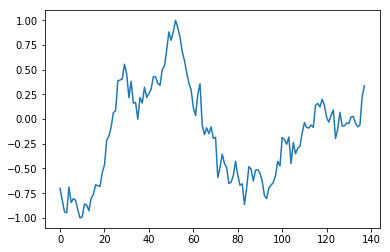

138


In [83]:
apple_stock = np.loadtxt('apple/normalized_apple_prices.csv')
from matplotlib import pyplot as plt
plt.plot(apple_stock)
plt.show()
print(len(apple_stock))

In [87]:
from RNN_utils import window_transform_series
X_, y = window_transform_series(dataset, 5)

In [88]:
print(X_.shape)

(133, 5)


In [92]:
# Parece un detalle pero las capas recurrentes en Keras exigen este formato
X = X_.reshape(X.shape[0], X.shape[1], 1) 

In [124]:
print('(N, T, D):')
print(X.shape)

(N, T, D):
(133, 5, 1)


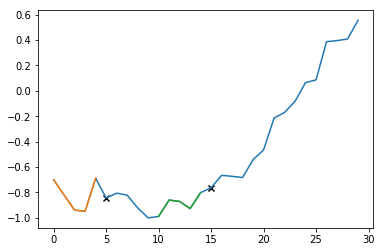

In [122]:
plt.plot(apple_stock[:30])
i1 = 0
plt.plot(range(i1,i1+5),X_[i1])
plt.scatter(i1+5, y[i1], marker='x', color='k')
i1 = 10
plt.plot(range(i1,i1+5),X_[i1])
plt.scatter(i1+5, y[i1], marker='x', color='k')

plt.show()

### Modelos de lenguaje
Predecir el siguiente caractar en función de los caracteres anteriores
- Utilizar one-hot encoding para los caracteres
- Tamaño de ventana de 100
- Cantidad total de caracteres de la obra: 67561
- Cantidad de caracteres diferentes: 71

In [136]:
text = open('federico-garcia-lorca/bodas_de_sangre.txt').read()
number_of_chars = len(text)
all_chars = sorted(set(text))
print('-----------------------------------------------------------------------------------------------------')
print('-----------------------------------------------------------------------------------------------------')
print('Cantidad de caracteres: ' + str(number_of_chars))
print('Cantidad de caracteres unicos: ' + str(len(all_chars)))
print(all_chars)
print('-----------------------------------------------------------------------------------------------------')
print('-----------------------------------------------------------------------------------------------------')
print()
print(text[:997])

-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------
Cantidad de caracteres: 67561
Cantidad de caracteres unicos: 71
['\n', ' ', '!', '(', ')', ',', '.', '1', '2', '3', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'y', 'z', '¡', '¿', 'É', 'Ñ', 'á', 'é', 'í', 'ñ', 'ó', 'ú']
-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------

BODAS DE SANGRE(1933)

Poema trágico en tres actos y siete cuadros

Personajes
 
Madre
Criada
Leonardo
Mozos
Novia
Vecina
Novio
Leñadores
Suegra
Muchachas
Padre de la nov

In [157]:
from RNN_utils import window_transform_text, encode_io_pairs

window_size = 100
step_size = 1
inputs, outputs = window_transform_text(text,window_size,step_size)

In [155]:
print(inputs[0])
print()
print('-----------------------------------------------------------------------------------------------------')
print('Salida:',outputs[0])
print('-----------------------------------------------------------------------------------------------------')
print()
print(inputs[1])
print('-----------------------------------------------------------------------------------------------------')
print('Salida:',outputs[1])
print('-----------------------------------------------------------------------------------------------------')

BODAS DE SANGRE(1933)

Poema trágico en tres actos y siete cuadros

Personajes
 
Madre
Criada
Leonar

-----------------------------------------------------------------------------------------------------
Salida: d
-----------------------------------------------------------------------------------------------------

ODAS DE SANGRE(1933)

Poema trágico en tres actos y siete cuadros

Personajes
 
Madre
Criada
Leonard
-----------------------------------------------------------------------------------------------------
Salida: o
-----------------------------------------------------------------------------------------------------


In [159]:
X, y = encode_io_pairs(text, all_chars, window_size,step_size)

In [167]:
print('Caracter codificado')
print(X[0,0].astype(int))

Caracter codificado
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [169]:
print('(N,T,D):')
print(X.shape)

(N,T,D):
(67461, 100, 71)
